# Finger Recognition

#We have a dataset of having four category images i.e. one-sample, two-samples, three-samples, four-samples.

#we have used OpenCV and Keras library for making model. Just you can give a image of finger and the model predict whether it is one, two, three or four. You can see model's accuracy is 98.639%

In [ ]:
#Importing libraries

In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os

In [9]:
os.chdir(r'E:\Data Science Projects')

In [10]:
ls

 Volume in drive E has no label.
 Volume Serial Number is 0C92-5301

 Directory of E:\Data Science Projects

07/13/2020  07:59 AM    <DIR>          .
07/13/2020  07:59 AM    <DIR>          ..
03/26/2020  04:38 PM    <DIR>          Adult
12/21/2019  08:37 PM    <DIR>          AQI
06/28/2020  04:33 PM    <DIR>          Bank-Note-Authentication
11/07/2019  06:59 AM    <DIR>          Breast Cancer
07/03/2020  09:03 AM    <DIR>          Car Brand Classification
06/07/2020  05:25 PM    <DIR>          Car Pricing EDA
07/01/2020  12:12 AM    <DIR>          Car Pricing Prediction
12/22/2019  06:22 PM    <DIR>          Deployments
01/01/2019  08:47 PM    <DIR>          dev
07/06/2020  11:38 PM    <DIR>          Diabetics prediction
11/24/2019  05:28 PM    <DIR>          Digit Recognizer
11/02/2019  06:36 PM    <DIR>          Disease_Detection
11/02/2019  06:36 PM    <DIR>          Fakenews
07/13/2020  07:59 AM    <DIR>          finger print classification
07/06/2020  07:47 AM    <DIR>          F

In [ ]:
#Here is the data directory path and in that there are four sub-directories:

#    1.One-sample
#    2.Two-sample
#    3.Three-sample
#    4.Four-sample

In [11]:
Data_dir = 'finger print classification\samples_of_fingers'
categories = ["one-samples", "two-samples", "Three-samples", "Four-samples"]

In [12]:
Data_dir

'finger print classification\\samples_of_fingers'

In [ ]:
#First we need to read only one image and display this image as Gray Scale

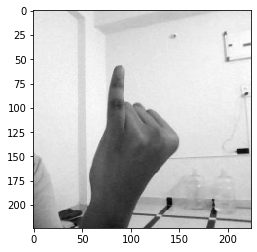

In [13]:
for category in categories:
    path=os.path.join(Data_dir,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap="gray")
        break
    break    

In [14]:
img_array

array([[170, 170, 170, ..., 176, 177, 176],
       [171, 171, 171, ..., 174, 175, 176],
       [172, 171, 172, ..., 174, 175, 175],
       ...,
       [ 82,  81,  82, ..., 155, 155, 154],
       [ 80,  79,  80, ..., 156, 154, 151],
       [ 78,  77,  78, ..., 156, 156, 155]], dtype=uint8)

In [15]:
img_array.shape

(224, 224)

In [16]:
#Now for all images we fixed the size of image is 50
img_size=50

In [17]:
new_array=cv2.resize(img_array,(img_size,img_size))#resizing the Image to 50

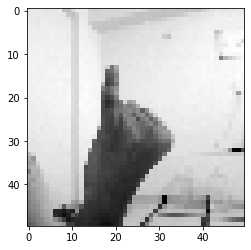

In [18]:
plt.imshow(new_array,cmap='gray')

In [19]:
#Now, all fine we look forward to all categories and convert images into its corresponding array
#Let's initializes a array which contains all the array of images in all the categories. I have made a function of loading data .

In [20]:
training_data=[]
def load_data():
    for category in categories:
        path=os.path.join(Data_dir,category)
        num_class=categories.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(img_size,img_size))
                training_data.append([new_array,num_class])
            except Exception as e:
                pass

In [21]:
load_data()

In [22]:
print(training_data[:10])

[[array([[171, 174, 174, ..., 174, 175, 174],
       [174, 174, 175, ..., 179, 177, 177],
       [175, 175, 172, ..., 179, 180, 180],
       ...,
       [ 95, 103, 110, ..., 147, 149, 149],
       [ 90,  97, 106, ...,  93,  85,  77],
       [ 81,  89, 102, ..., 153, 154, 155]], dtype=uint8), 0], [array([[172, 173, 174, ..., 175, 175, 177],
       [172, 174, 175, ..., 178, 177, 178],
       [175, 175, 174, ..., 179, 179, 179],
       ...,
       [ 94, 102, 111, ..., 146, 148, 148],
       [ 90,  98, 106, ..., 103,  92,  76],
       [ 84,  92, 101, ..., 154, 154, 154]], dtype=uint8), 0], [array([[173, 172, 172, ..., 175, 174, 173],
       [172, 175, 174, ..., 178, 179, 176],
       [174, 176, 174, ..., 179, 179, 179],
       ...,
       [ 93, 101, 109, ..., 148, 146, 148],
       [ 89,  98, 106, ...,  92,  82,  78],
       [ 82,  92,  98, ..., 152, 155, 155]], dtype=uint8), 0], [array([[171, 173, 173, ..., 176, 177, 177],
       [172, 174, 172, ..., 177, 178, 178],
       [175, 176, 173,

In [23]:
print(len(training_data))

1984


In [ ]:
#In this dataset, we have four categories and these categories are in a series i.e. first we have four sample images then all the images are of four. So, we shuffle the data by using random.shuffle

In [24]:
import random
random.shuffle(training_data)

In [25]:
print(training_data[:10])

[[array([[169, 173, 172, ..., 181, 183, 181],
       [173, 174, 173, ..., 185, 187, 187],
       [174, 174, 174, ..., 186, 188, 188],
       ...,
       [ 69,  76,  58, ..., 143, 112,  82],
       [ 64,  51,  46, ..., 159, 152,  73],
       [ 50,  37,  38, ..., 161, 161, 120]], dtype=uint8), 0], [array([[181, 182, 185, ..., 195, 196, 196],
       [187, 184, 186, ..., 197, 198, 199],
       [187, 186, 187, ..., 202, 200, 202],
       ...,
       [ 44,  42,  45, ..., 105, 142, 137],
       [ 40,  40,  40, ..., 173, 166,  72],
       [ 34,  33,  36, ..., 174, 172,  85]], dtype=uint8), 0], [array([[179, 178, 179, ..., 175, 173, 176],
       [179, 179, 181, ..., 178, 176, 177],
       [180, 180, 181, ..., 178, 177, 178],
       ...,
       [ 88,  98, 105, ...,  57, 154, 155],
       [ 73,  87, 101, ...,  70, 155, 156],
       [ 78,  85,  90, ..., 107, 155, 154]], dtype=uint8), 2], [array([[203, 201, 200, ..., 223, 224, 222],
       [195, 204, 202, ..., 237, 239, 224],
       [173, 202, 203,

In [26]:
for labels in training_data[:10]:
    print(labels[1])

0
0
2
3
3
3
3
2
2
1


In [27]:
#Assign the data to X and labels to y arrays.
X=[]
y=[]
for features,labels in training_data:
    X.append(features)
    y.append(labels)

In [28]:
#We reshape the array X into the image shape i.e. (no_of_training_examples, image_size, image_size, 1). 1 is for gray scale and if you want to read all images in coloured you can use 3 instead of 1 in the reshape function.

In [29]:
X=np.array(X).reshape(-1,img_size,img_size,1)

In [30]:
X.shape

(1984, 50, 50, 1)

In [31]:
#Here we start making model using keras
import keras

In [ ]:
#In keras library, there is a fuction to_categorical which do the one hot encoding.

In [32]:
y=keras.utils.to_categorical(y,num_classes=4)

In [33]:
#And add on the layers in the keras model and compile the model

In [36]:
model=keras.Sequential([
    keras.layers.Conv2D(256,(3,3),strides=(1,1),padding="valid",input_shape=(50,50,1)),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Conv2D(128,(3,3),strides=(1,1),padding="valid"),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Conv2D(64,(3,3),strides=(1,1),padding="valid"),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation="relu"),
    keras.layers.Dense(4,activation="softmax")
])

In [37]:
model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
#Let's start the training part of our model

In [38]:
model.fit(X,y,epochs=5)

Epoch 1/5
62/62 [==============================] - 46s 739ms/step - loss: 31.4020 - accuracy: 0.3347
Epoch 2/5
62/62 [==============================] - 46s 745ms/step - loss: 0.6561 - accuracy: 0.7530
Epoch 3/5
62/62 [==============================] - 46s 749ms/step - loss: 0.3901 - accuracy: 0.8750
Epoch 4/5
62/62 [==============================] - 46s 745ms/step - loss: 0.2322 - accuracy: 0.9415
Epoch 5/5
62/62 [==============================] - 45s 731ms/step - loss: 0.1660 - accuracy: 0.9612


In [39]:
y_pred=model.predict(X)

In [40]:
y_pred

array([[9.6789181e-01, 2.0617463e-03, 1.8202713e-02, 1.1843701e-02],
       [9.7742999e-01, 3.7484817e-04, 2.0808551e-02, 1.3866349e-03],
       [1.6230583e-03, 5.8402706e-02, 9.1570103e-01, 2.4273122e-02],
       ...,
       [9.9780494e-01, 2.3463266e-05, 2.1562874e-03, 1.5354048e-05],
       [4.1771505e-02, 2.5495615e-02, 9.2936468e-01, 3.3682154e-03],
       [1.5876129e-02, 3.3957228e-02, 9.2161620e-01, 2.8550426e-02]],
      dtype=float32)

In [41]:
y_pred.shape

(1984, 4)

In [42]:
#In predictions array there are some predction scores. Let's make a threshold value.

In [43]:
for i in range(len(y_pred)):
    for j in range(4):
        if y_pred[i][j]>=0.50:
            y_pred[i][j]=1
        else:
            y_pred[i][j]=0

In [44]:
y_pred

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [45]:
loss,acc=model.evaluate(X,y)
print("Loss :",loss)
print("Accuracy :",acc)

62/62 [==============================] - 13s 203ms/step - loss: 0.1349 - accuracy: 0.9803
Loss : 0.13487304747104645
Accuracy : 0.9803427457809448


In [46]:
#Test the images on our model and see it is correct or not.

In [47]:
img='finger print classification\samples_of_fingers\Four-samples/101.jpg'

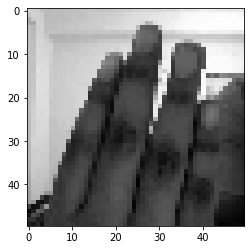

In [48]:
img_array_1=cv2.imread(img,cv2.IMREAD_GRAYSCALE)
img_array_1=cv2.resize(img_array_1,(50,50))
plt.imshow(img_array_1,cmap="gray")
plt.show()
img_array_1=np.array(img_array_1).reshape(-1,img_size,img_size,1)

In [49]:
y_pred_1=model.predict(img_array_1)

In [50]:
y_pred_1

array([[1.1811176e-07, 1.0581329e-06, 6.6673892e-05, 9.9993217e-01]],
      dtype=float32)

In [51]:
for i in range(len(y_pred_1)):
    for j in range(4):
        if y_pred_1[i][j]>=0.50:
            y_pred_1[i][j]=1
        else:
            y_pred_1[i][j]=0

In [52]:
for i in range(len(y_pred_1)):
    for j in range(4):
        if y_pred_1[i][j]==1:
            print("This is ",j+1)

This is  4
